# GRAPL: Tutorial 02


Tutorial illustrating the use of the GRAPL library, for representing, analyzing and processing
**acyclic directed mixed graphs** (**ADMG**s) for structural causal modelling.

**License**: CC BY-SA 4.0 2021. 


If you use this code, please cite:

Little, M. A., Badawy, R. (2019). [Causal bootstrapping](https://arxiv.org/pdf/1910.09648.pdf), *ArXiV*, arXiv:1910.09648

In [1]:
import grapl.algorithms as algs
import grapl.dsl as dsl

### Create a GRAPL DSL parser

In [2]:
grapl_obj = dsl.GraplDSL()

### Create a DAG from a GRAPL string

In [3]:
dag_grapl = ' "Symptoms"; \
    Sinus; Headache; Nose; Flu; Allergy; \
    Sinus -> Nose; \
    Flu -> Sinus; \
    Sinus -> Headache; \
    Allergy -> Sinus;'

G = grapl_obj.readgrapl(dag_grapl)

### Display the DAG object

#### Text description

In [4]:
G.display()

Title: "Symptoms"
Vars: Headache,Nose,Allergy,Flu,Sinus
Parents:
Headache <- Sinus
Nose <- Sinus
Sinus <- Flu,Allergy
Children:
Allergy -> Sinus
Flu -> Sinus
Sinus -> Headache,Nose
Bidirects:


#### Graph

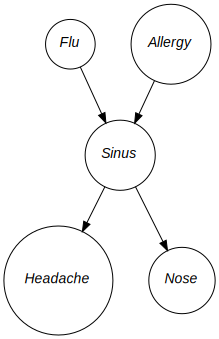

In [5]:
G

**NOTE:** Node size is *not meaningful*. It's a mere artifact of autoscaling.

### Check if the DAG is acyclic

In [6]:
G.isdag() # Expected: True

True

### Get topological sort of DAG nodes

In [7]:
G.topsort()

['Allergy', 'Flu', 'Sinus', 'Nose', 'Headache']

### Get all ancestors of `Headache`

In [8]:
G.an({'Headache'}) # Expected: {'Allergy', 'Headache', 'Sinus', 'Flu'}

{'Allergy', 'Flu', 'Headache', 'Sinus'}

### Get all DAG local Markov conditional independence relations

In [9]:
ci, ci_str, is_dag = algs.localmarkov(G)

ci # Expected: # (Headache⊥Nose,Allergy,Flu|Sinus),(Nose⊥Allergy,Headache,Flu|Sinus),(Flu⊥Allergy),(Allergy⊥Flu)

### Get factorized joint distribution over `Headache`, `Allergy`, `Flu`

In [10]:
factor_str, factor_eqn, isdag = algs.dagfactor(G, {'Headache','Allergy','Flu'})

factor_eqn # Expected: p(Flu,Allergy,Headache)=\sum_{Sinus}[p(Sinus|Flu,Allergy)p(Headache|Sinus)p(Allergy)p(Flu)]

### Get interventional (cause-effect) distribution of `Sinus` on `Headache`, `Allergy`, `Flu`

In [11]:
id_str, id_eqn, isdag = algs.truncfactor(G, {'Sinus'}, {'Headache','Allergy','Flu'})

id_eqn # Expected: p_{Sinus}(Flu,Allergy,Headache)=[p(Headache|Sinus)p(Allergy)p(Flu)]